In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,roc_auc_score, SCORERS, mean_squared_error, plot_roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

# Balancing Method with Cross Validation

In [4]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [5]:
X = bankloan[['employ','debtinc','creddebt','othdebt']]
y = bankloan['default']

### Data Splitting

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,stratify=y,random_state=1899,test_size=0.2)

## Resampling: SMOTE

In [11]:
smote = SMOTE()
model = LogisticRegression()

estimator=Pipeline([
    ('balancing',smote),
    ('model',model)
])

In [12]:
skfold = StratifiedKFold(n_splits=5)
model_cv = cross_val_score(estimator, X_train_val, y_train_val,cv=skfold, scoring='f1')

In [13]:
print('cv score:',model_cv)
print('cv score mean:', model_cv.mean())

cv score: [0.53658537 0.6        0.61764706 0.75       0.55555556]
cv score mean: 0.6119575960465488


## Algo Based: Penalized

In [14]:
model = LogisticRegression(class_weight='balanced')
skfold = StratifiedKFold(n_splits=5)
model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring='f1')

In [15]:
print('cv score:',model_cv)
print('cv score mean:', model_cv.mean())

cv score: [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
cv score mean: 0.6112109760593905


## Combining Balancing Method with Hyperparameter Tuning

In [21]:
smote = SMOTE(random_state=1899)
model = LogisticRegression()
estimator=Pipeline([
    ('balancing',smote),
    ('model',model)
])


In [28]:
hyperparam_space = {
    'balancing__k_neighbors':[2,5,10,15,20],
    'model__C':[100,10,1,0.1,0.01,0.001],
    'model__solver':['liblinear','newton-cg']
}

skfold = StratifiedKFold(n_splits=5)

In [29]:
grid_search = GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1)

In [30]:
grid_search.fit(X_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [31]:
print('best score', grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6208019206264821
best param {'balancing__k_neighbors': 15, 'model__C': 0.1, 'model__solver': 'liblinear'}


## Before Tuning

In [32]:
smote = SMOTE()
model = LogisticRegression()
estimator=Pipeline([
    ('balancing',smote),
    ('model',model)
])

In [33]:
estimator.fit(X_train_val,y_train_val)
y_pred = estimator.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       103
           1       0.53      0.92      0.67        37

    accuracy                           0.76       140
   macro avg       0.75      0.81      0.74       140
weighted avg       0.85      0.76      0.78       140



## After Tuning

In [34]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)
y_pred=grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       103
           1       0.52      0.89      0.66        37

    accuracy                           0.76       140
   macro avg       0.74      0.80      0.74       140
weighted avg       0.84      0.76      0.77       140



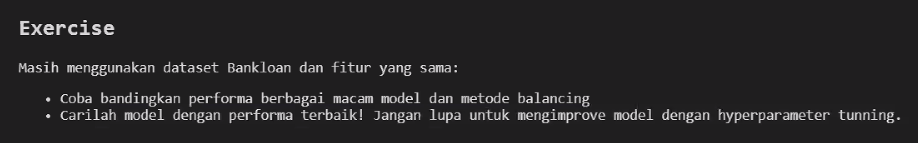

In [35]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [36]:
X = bankloan[['employ','debtinc','creddebt','othdebt']]
y = bankloan['default']

In [37]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,stratify=y,random_state=2021,test_size=0.2)

## Model Benchmark: Balancing and Cross Validation (Before Tuning)

In [57]:
balancing = [NearMiss(),SMOTE(),RandomOverSampler(),RandomUnderSampler()]
model = [LogisticRegression(),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier()]

In [58]:
def balancingBench(balancings, models):
    skfold = StratifiedKFold(n_splits=5)
    df = pd.DataFrame(columns=['Model','Balancing','1','2','3','4','5','mean','std'])
    for i in models:
        for j in balancings:
            estimator=Pipeline([('balancing',j),('model',i)])
            arr = cross_val_score(estimator, X_train_val, y_train_val, cv = skfold, scoring='f1')
            df = df.append({'Model':str(estimator[-1]), 'Balancing':str(estimator[-2]),'1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean':arr.mean(),'std':arr.std()}, ignore_index=True)
    return df

In [59]:
balancingBench(balancing, model).sort_values(['mean'],ascending=False)

,Model,Balancing,1,2,3,4,5,mean,std
3,LogisticRegression(),RandomUnderSampler(),0.648649,0.563380,0.609756,0.676923,0.560000,0.611742,0.046110
1,LogisticRegression(),SMOTE(),0.647887,0.540541,0.625000,0.687500,0.521739,0.604533,0.063454
2,LogisticRegression(),RandomOverSampler(),0.694444,0.555556,0.602410,0.625000,0.507463,0.596974,0.063314
11,KNeighborsClassifier(),RandomUnderSampler(),0.591549,0.500000,0.575000,0.553846,0.481013,0.540282,0.042786
6,DecisionTreeClassifier(max_depth=5),RandomOverSampler(),0.580645,0.507463,0.571429,0.430769,0.405405,0.499142,0.071272
0,LogisticRegression(),NearMiss(),0.477273,0.506667,0.500000,0.432432,0.525000,0.488274,0.031824
9,KNeighborsClassifier(),SMOTE(),0.480000,0.492754,0.550000,0.477612,0.435897,0.487253,0.036743
10,KNeighborsClassifier(),RandomOverSampler(),0.507042,0.444444,0.500000,0.507042,0.467532,0.485212,0.025085
7,DecisionTreeClassifier(max_depth=5),RandomUnderSampler(),0.459016,0.549020,0.559140,0.419753,0.412698,0.479925,0.062652
5,DecisionTreeClassifier(max_depth=5),SMOTE(),0.571429,0.400000,0.574713,0.465116,0.382353,0.478722,0.081827


Model Logistic Regression dengan Balancing Random Over Sampler memiliki mean f1 tertinggi diikuti oleh balancing SMOTE dengan model yang sama, karena kedua model dan balancing tersebut memiliki performa yang mirip, maka kita akan mengetes model tersebut dengan data tes

## Model Test Set

### Logistic Regression: Random Under Sample

In [62]:
balancing_under = RandomUnderSampler()
model = LogisticRegression()
estimator_under =Pipeline([
    ('balancing',balancing_under),
    ('model',model)
])

### Logistic Regression: SMOTE

In [63]:
balancing_smote = SMOTE()
model = LogisticRegression()
estimator_smote =Pipeline([
    ('balancing',balancing_smote),
    ('model',model)
])

### Comparison

In [64]:
estimator_under.fit(X_train_val,y_train_val)
y_pred = estimator_under.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       103
           1       0.55      0.78      0.64        37

    accuracy                           0.77       140
   macro avg       0.73      0.78      0.74       140
weighted avg       0.81      0.77      0.78       140



In [65]:
estimator_smote.fit(X_train_val,y_train_val)
y_pred = estimator_smote.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       103
           1       0.57      0.78      0.66        37

    accuracy                           0.79       140
   macro avg       0.74      0.79      0.75       140
weighted avg       0.82      0.79      0.79       140



Dari hasil test dengan dataset, balancing SMOTE memiliki performa scoring f1 yang lebih tinggi daripada Random Under Sampe dengan perbandingan 66 dengan 64, kita akan mencoba untuk hyperparameter tuning untuk kedua metode tersebut untuk mencari metode yang terbaik

## Hyperparameter Tuning

### Logistic Regression: Random Under Sample

In [77]:
balancing_under = RandomUnderSampler()
model = LogisticRegression()
estimator_under =Pipeline([
    ('balancing',balancing_under),
    ('model',model)
])

In [109]:
hyperparam_space = {
    'balancing__sampling_strategy':['minority','majority','not minority','all','auto'],
    'model__C':[1000,100,10,1,0.1,0.01,0.001,0.0001],
    'model__solver':['liblinear','newton-cg','lbfgs'],
    'model__max_iter':[20,50,100,200,500,1000]
}

skfold = StratifiedKFold(n_splits=5)

In [110]:
grid_search = GridSearchCV(
    estimator_under,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1)

In [111]:
grid_search.fit(X_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', RandomUnderSampler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__sampling_strategy': ['minority',
                                                          'majority',
                                                          'not minority', 'all',
                                                          'auto'],
                         'model__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001,
                                      0.0001],
                         'model__max_iter': [20, 50, 100, 200, 500, 1000],
                         'model__solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='f1')

In [112]:
print('best score', grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6282319506335845
best param {'balancing__sampling_strategy': 'majority', 'model__C': 100, 'model__max_iter': 20, 'model__solver': 'liblinear'}


In [113]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)
y_pred=grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       103
           1       0.56      0.73      0.64        37

    accuracy                           0.78       140
   macro avg       0.73      0.76      0.74       140
weighted avg       0.80      0.78      0.79       140



### Logistic Regression: SMOTE

In [114]:
balancing_smote = SMOTE()
model = LogisticRegression()
estimator_smote =Pipeline([
    ('balancing',balancing_smote),
    ('model',model)
])

In [103]:
estimator_smote.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'balancing', 'model', 'balancing__k_neighbors', 'balancing__n_jobs', 'balancing__random_state', 'balancing__sampling_strategy', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [118]:
hyperparam_space = {
    'balancing__sampling_strategy':['minority','majority','not minority','all','auto'],
    'balancing__k_neighbors':[2,3,5,10,15,20,30,50,100],
#     'balancing__m_neighbors':[2,3,5,10,15,20,30,50,100],
#     'balancing__kind':['regular','borderline1','borderline2','svm'],
    
    'model__C':[1000,100,10,1,0.1,0.01,0.001,0.0001],
    'model__solver':['liblinear','newton-cg','lbfgs'],
    'model__max_iter':[20,50,100,200,500,1000]
}

skfold = StratifiedKFold(n_splits=5)

In [119]:
grid_search = GridSearchCV(
    estimator_smote,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1)

In [120]:
grid_search.fit(X_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 3, 5, 10, 15, 20, 30, 50,
                                                    100],
                         'balancing__sampling_strategy': ['minority',
                                                          'majority',
                                                          'not minority', 'all',
                                                          'auto'],
                         'model__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001,
                                      0.0001],
                         'model__max_iter': [20, 50, 100, 200, 500, 1000],
                         'model__solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='f1')

In [121]:
print('best score', grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6238530196863531
best param {'balancing__k_neighbors': 30, 'balancing__sampling_strategy': 'minority', 'model__C': 1000, 'model__max_iter': 20, 'model__solver': 'lbfgs'}


In [122]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)
y_pred=grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       103
           1       0.57      0.78      0.66        37

    accuracy                           0.79       140
   macro avg       0.74      0.79      0.75       140
weighted avg       0.82      0.79      0.79       140



SUMMARY

Logistic Regression: Random Under Sampling before Tuning

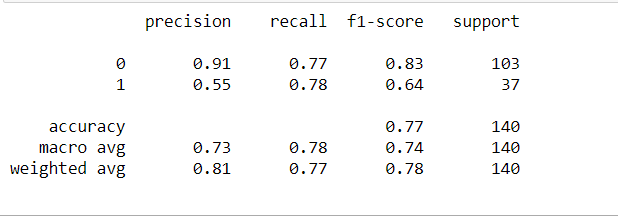

Logistic Regression: Random Under Sampling after Tuning

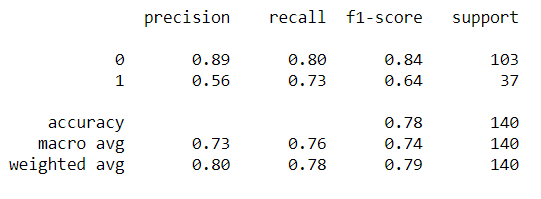

Logistic Regression: SMOTE before Tuning

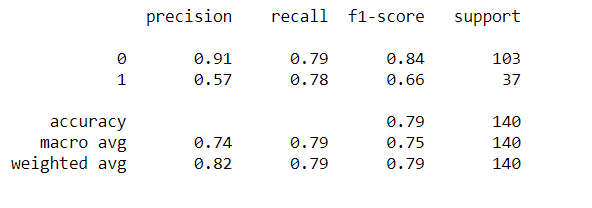

Logistic Regression: SMOTE after Tuning

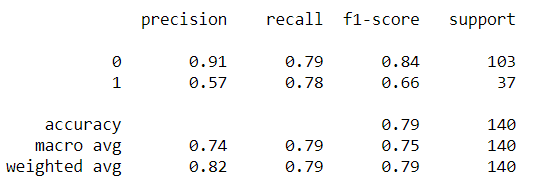

Untuk kedua metode diatas tidak mengalami perubahan baik sebelum dan setelah di tuning, namun dari segi performa f1-score model Logistic Regression dengan balancing SMOTE mencapai skor tertinggi senilai 0.66